Example: Running the Stokes code to explore topographic decay on floating viscous sheets

The code requires FEniCS---see the README for details.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../source')

import matplotlib.pyplot as plt
from post_process import get_decay_rate
from theory import t_p, t_m, h_exact, s_exact
from params import t_e, t_r
import numpy as np

Plot theoretical decay timescale from linearized analysis:

In [2]:
t = np.linspace(0,30,1000)

In [3]:
# # check to make sure analytic solutions are sensible 
# k = 10
# h = h_exact(t,k)

# plt.plot(t,h)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel(r'$t\,/\,t_\mathrm{e}$',fontsize=20)
# plt.ylabel(r'$h$',fontsize=20)
# plt.show()
# plt.close()

In [4]:
k = np.logspace(-2,2,500)
t_h = np.zeros(k.size)
t_s = np.zeros(k.size)

for i in range(k.size):
    h = h_exact(t,k[i])
    s = s_exact(t,k[i])
    t_h[i],temp = get_decay_rate(h,t*t_e)
    t_s[i],temp = get_decay_rate(s,t*t_e)

t_theory = t_p(k)
t_hydro = t_m(k)

Next, we load the FEM solutions for plotting.

**Surface perturbations:**

In [5]:
res = np.load('results_surface.npy',allow_pickle=True).item()
results =  res['results']
lamdas = res['lamdas']
t_ = res['t']
k_h = (2*np.pi/lamdas)
t_h_fem = np.zeros(lamdas.size)
for i in range(lamdas.size):
    h_max = results[i][0]
    # s_max = results[i][1]
    t_i,h_pred = get_decay_rate(h_max,t_)
    t_h_fem[i] = t_i

**Base perturbations:**

In [31]:
res = np.load('results_base.npy',allow_pickle=True).item()
results =  res['results']
lamdas = res['lamdas']
t_ = res['t']
k_s = (2*np.pi/lamdas)
t_s_fem = np.zeros(lamdas.size)
for i in range(lamdas.size):
    s_max = results[i][1]
    t_i,s_pred = get_decay_rate(s_max,t_)
    t_s_fem[i] = t_i

Compare analytical solutions with isothermal FEM solutions:

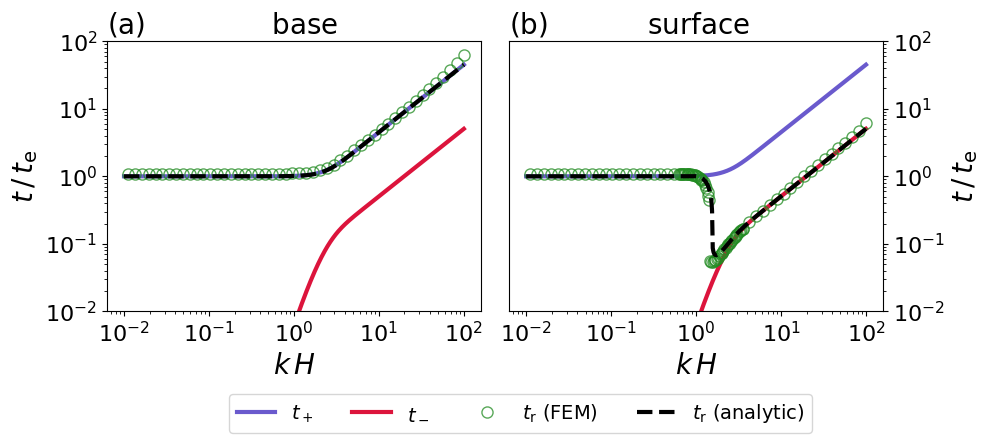

In [33]:
%matplotlib inline 
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title(r'(a) $\qquad\qquad$ base',loc='left',fontsize=20)
plt.plot(k,t_theory,color='slateblue',linewidth=3,label=r'$t_+$')
plt.plot(k,t_hydro,color='crimson',linewidth=3,label=r'$t_-$')
plt.plot(k_s,t_s_fem,'o',color='forestgreen',fillstyle='none',markersize=8,label=r'$t_\mathrm{r}$ (FEM)',alpha=0.75)
plt.plot(k,t_s,'k--',linewidth=3,label=r'$s$ fit')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2,1e2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$k\,H$',fontsize=20)
plt.ylabel(r'$t\,/\,t_\mathrm{e}$',fontsize=20)

plt.subplot(122)
plt.title(r'(b) $\qquad\quad$ surface',loc='left',fontsize=20)
plt.plot(k,t_theory,color='slateblue',linewidth=3,label=r'$t_+$')
plt.plot(k,t_hydro,color='crimson',linewidth=3,label=r'$t_-$')
plt.plot(k_h,t_h_fem,'o',color='forestgreen',fillstyle='none',markersize=8,label=r'$t_\mathrm{r}$ (FEM)',alpha=0.75)
plt.plot(k,t_h,'k--',linewidth=3,label=r'$t_\mathrm{r}$ (analytic)')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2,1e2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$k\,H$',fontsize=20)
plt.ylabel(r'$t\,/\,t_\mathrm{e}$',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=14,ncol=4,loc=(-0.75,-0.45))
plt.show()

Exploring variable viscosity structure:

In [62]:
from stokes import eta
from params import eta0,H

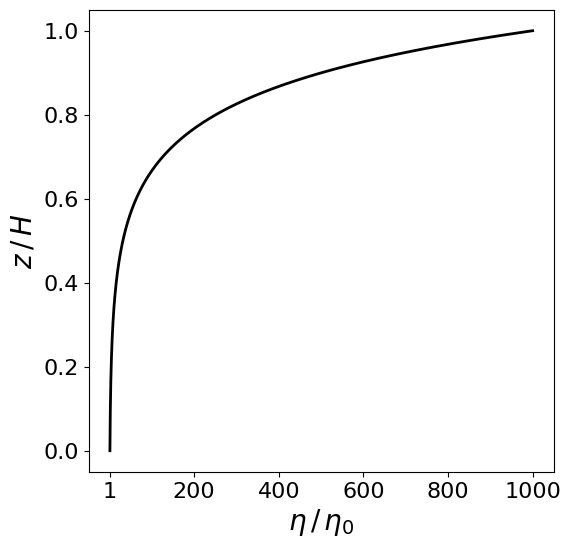

In [65]:
z = np.linspace(0,H,1000)
ticks = np.arange(0,1005,200)
ticks[0] = 1
plt.figure(figsize=(6,6))
plt.plot(eta(z)/eta0,z/H,'k-',linewidth=2)
plt.xticks(ticks,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\eta\,/\,\eta_0$',fontsize=20)
plt.ylabel(r'$z\,/\,H$',fontsize=20)
plt.show()
plt.close()